### Notebook for analysing Giessen data

In [1]:
from AnalysisGiessen import analyseGiessen
import pandas as pd
import numpy as np 

In [2]:
pat_id = 'pat_4'
file = pd.read_csv(f"../Data/Giessen/Night/{pat_id}.csv")
file[["Pressure", "cPressure"]] = file[["Pressure [mmHg]", "Compensated Pressure [mmHg]"]]
ag = analyseGiessen(df = file)


In [3]:
ag.df

,Time,Pressure [mmHg],Compensated Pressure [mmHg],Pressure,cPressure
0,2022-09-27 02:06:56.101,4.8,32.3,4.8,32.3
1,2022-09-27 02:06:56.105,3.6,31.0,3.6,31.0
2,2022-09-27 02:06:56.109,1.9,29.4,1.9,29.4
3,2022-09-27 02:06:56.113,-0.4,27.0,-0.4,27.0
4,2022-09-27 02:06:56.117,-3.0,24.4,-3.0,24.4
...,...,...,...,...,...
899995,2022-09-27 03:06:56.081,-18.7,7.6,-18.7,7.6
899996,2022-09-27 03:06:56.085,-19.4,6.9,-19.4,6.9
899997,2022-09-27 03:06:56.089,-20.2,6.1,-20.2,6.1
899998,2022-09-27 03:06:56.093,-20.8,5.6,-20.8,5.6


In [4]:
ag.compute_derivatives()

In [5]:
ag.compute_points_of_interest()


In [6]:
sumstats = ag.points_df

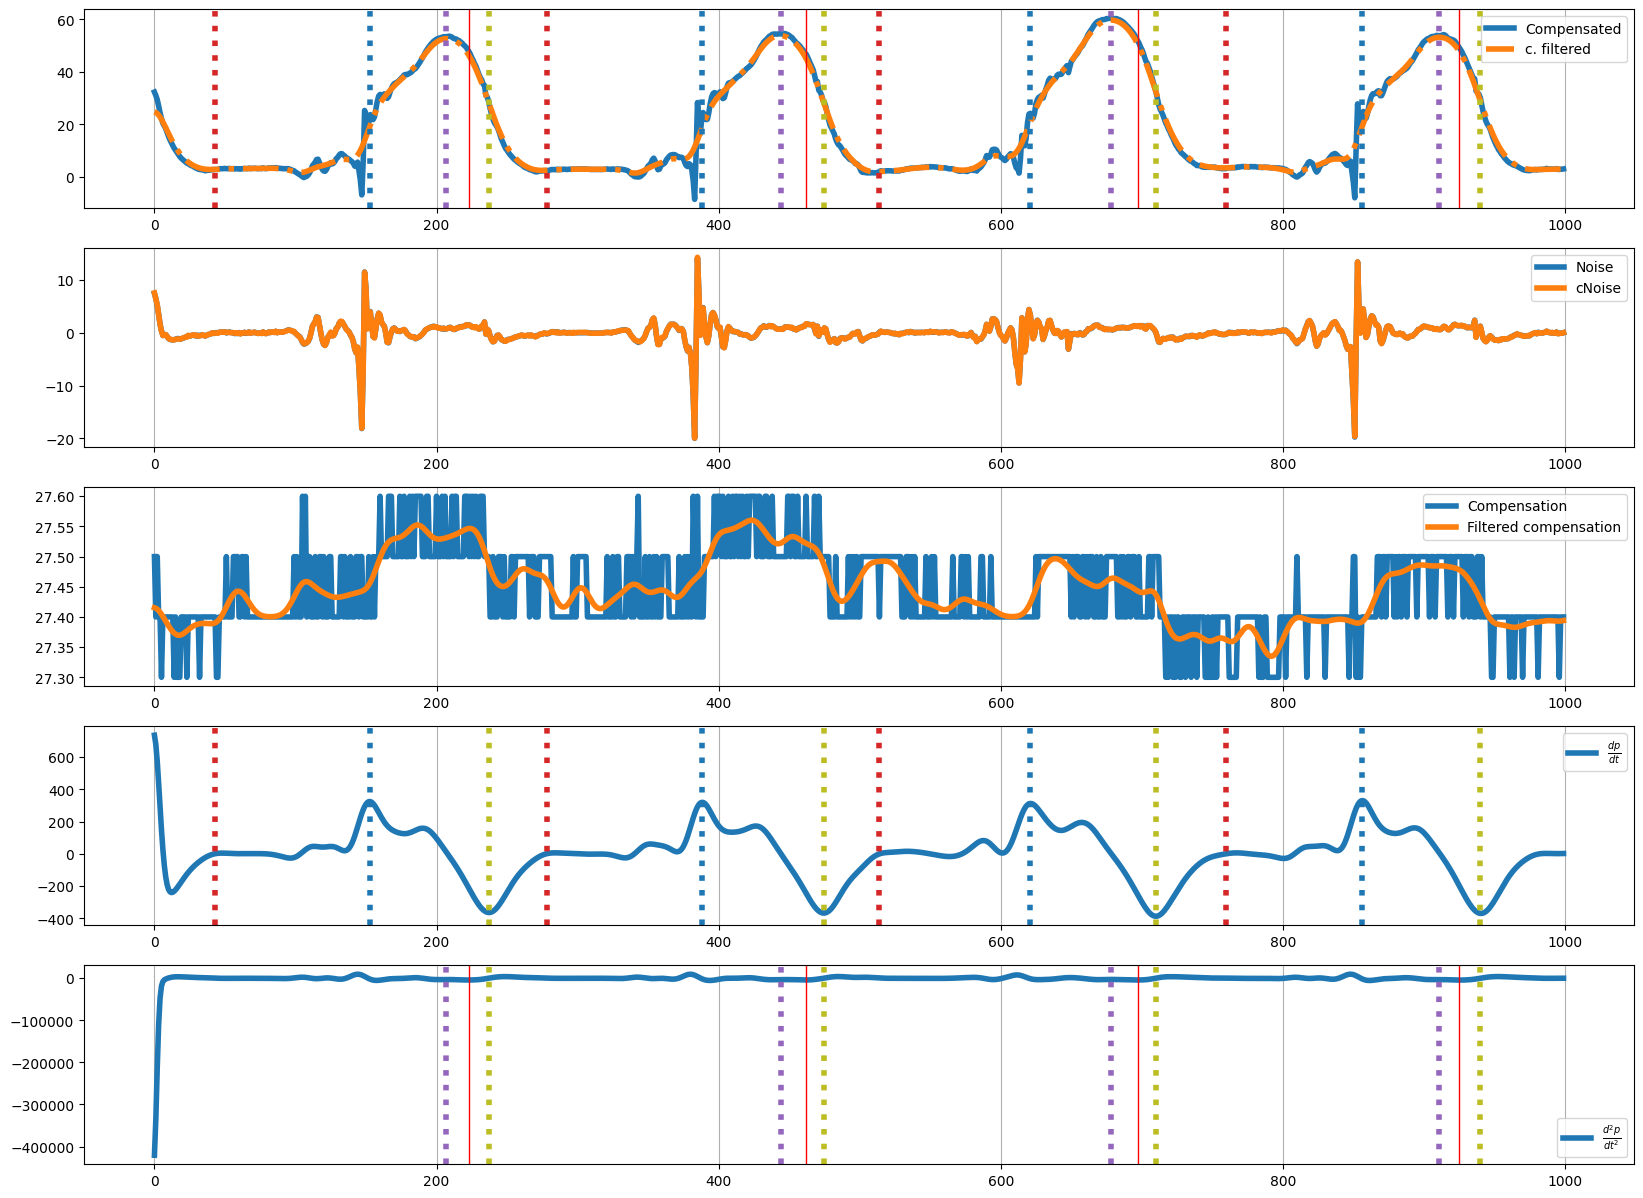

In [7]:
ag.plot_pressures(start=0, finish=1000)

In [8]:
beats = pd.DataFrame(ag.resample_heart_beat())

In [9]:
print(beats.shape)
print(type(beats))
print(sumstats.shape)

(3888, 101)
<class 'pandas.core.frame.DataFrame'>
(3889, 28)


In [10]:
pat_4_new_df = pd.concat([beats, sumstats.iloc[:-1,:]], axis=1)
pat_4_new_df

,0,1,2,3,4,5,6,7,8,9,...,A_p,P_max,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR
0,2.824339,2.890218,2.958401,3.014484,3.051555,3.072676,3.084245,3.093753,3.106332,3.123122,...,23.951910,60.494437,46.219781,52.668575,0.235966,2.824339,0.034893,0.308843,0.000,0.000000
1,2.468537,2.541695,2.623106,2.697837,2.758768,2.806704,2.844543,2.875211,2.900010,2.917309,...,22.908262,60.558837,45.074965,53.796053,0.255683,2.468537,0.034093,0.343514,0.940,63.829787
2,1.956207,2.045598,2.142903,2.236184,2.331610,2.443358,2.581238,2.743866,2.919773,3.092839,...,26.628938,65.438522,50.680320,59.742973,0.225528,1.956207,0.039373,0.291202,0.944,63.559322
3,3.400872,3.442584,3.506324,3.580516,3.653055,3.713308,3.753498,3.771302,3.767630,3.745967,...,23.918049,61.042976,47.950089,53.179167,0.214486,3.400872,0.034654,0.273052,0.984,60.975610
4,2.795139,2.842213,2.884807,2.914862,2.931744,2.942021,2.953185,2.971741,2.999411,3.034222,...,23.517631,59.710287,46.032192,52.326318,0.229074,2.795139,0.035295,0.297142,0.888,67.567568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,2.948140,2.975897,3.006111,3.032431,3.051094,3.060332,3.058967,3.044789,3.012987,2.954829,...,24.512082,64.801324,48.997532,56.127948,0.243881,2.948140,0.032390,0.322543,0.936,64.102564
3884,2.678721,2.741287,2.791922,2.818794,2.819677,2.799730,2.767632,2.731453,2.698700,2.675143,...,25.101736,64.965034,47.350325,56.080512,0.271141,2.678721,0.034145,0.372008,0.836,71.770335
3885,2.635322,2.707906,2.770907,2.806028,2.806701,2.780006,2.738960,2.696742,2.663819,2.644958,...,24.043180,63.916084,49.169662,55.563042,0.230715,2.635322,0.032351,0.299909,0.916,65.502183
3886,2.265161,2.315320,2.361723,2.392788,2.403106,2.396105,2.378025,2.356691,2.339475,2.331079,...,23.460441,62.618596,47.874164,55.717172,0.235464,2.265161,0.032733,0.307983,0.924,64.935065


In [11]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

df = pat_4_new_df.copy()

# Copy the data and separate the target variable (only pressure traces)
X = df.iloc[:,:100].copy() # traces only

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it - standardize
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names, index=df.index)

X_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.531320,-0.715009,-4.540111,0.600573,0.410065,-0.787575,-0.294332,0.127155,-0.161324,0.086208
1,-6.621064,0.408444,-4.073112,1.561743,-0.472258,-0.173932,-0.323620,0.220517,-0.527396,-0.019008
2,0.267168,-3.283988,2.252173,-0.317338,0.058215,-1.892459,0.131948,-0.416572,0.116368,0.117581
3,-1.588285,-2.862969,-2.863900,-0.515466,1.595705,0.372057,0.847610,-0.207487,-0.114391,0.133214
4,-5.829633,-0.646013,-4.724306,0.915784,0.809399,-1.200153,-0.301901,0.256347,-0.122675,0.096300


In [13]:
pat_4_new_df = pd.concat([df, X_pca], axis=1)
pat_4_new_df.to_csv(f'../Data/Giessen/Night/{pat_id}_resampled.csv', index=False)
pat_4_new_df

,0,1,2,3,4,5,6,7,8,9,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.824339,2.890218,2.958401,3.014484,3.051555,3.072676,3.084245,3.093753,3.106332,3.123122,...,-5.531320,-0.715009,-4.540111,0.600573,0.410065,-0.787575,-0.294332,0.127155,-0.161324,0.086208
1,2.468537,2.541695,2.623106,2.697837,2.758768,2.806704,2.844543,2.875211,2.900010,2.917309,...,-6.621064,0.408444,-4.073112,1.561743,-0.472258,-0.173932,-0.323620,0.220517,-0.527396,-0.019008
2,1.956207,2.045598,2.142903,2.236184,2.331610,2.443358,2.581238,2.743866,2.919773,3.092839,...,0.267168,-3.283988,2.252173,-0.317338,0.058215,-1.892459,0.131948,-0.416572,0.116368,0.117581
3,3.400872,3.442584,3.506324,3.580516,3.653055,3.713308,3.753498,3.771302,3.767630,3.745967,...,-1.588285,-2.862969,-2.863900,-0.515466,1.595705,0.372057,0.847610,-0.207487,-0.114391,0.133214
4,2.795139,2.842213,2.884807,2.914862,2.931744,2.942021,2.953185,2.971741,2.999411,3.034222,...,-5.829633,-0.646013,-4.724306,0.915784,0.809399,-1.200153,-0.301901,0.256347,-0.122675,0.096300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,2.948140,2.975897,3.006111,3.032431,3.051094,3.060332,3.058967,3.044789,3.012987,2.954829,...,1.098696,-5.635040,0.878500,1.068934,0.962332,1.976272,1.285328,1.748491,0.049217,-0.235084
3884,2.678721,2.741287,2.791922,2.818794,2.819677,2.799730,2.767632,2.731453,2.698700,2.675143,...,-4.789452,-0.919854,-1.229998,0.570865,0.035829,-0.035858,-0.001651,-0.266849,0.692812,0.250340
3885,2.635322,2.707906,2.770907,2.806028,2.806701,2.780006,2.738960,2.696742,2.663819,2.644958,...,-4.940340,-1.905568,-1.719312,-0.002245,-0.261728,-0.130873,-0.112594,-0.116499,0.743709,0.315592
3886,2.265161,2.315320,2.361723,2.392788,2.403106,2.396105,2.378025,2.356691,2.339475,2.331079,...,-7.049740,-1.878627,-2.334354,0.083497,-2.631279,1.162542,-0.529182,-0.121969,0.175947,0.106774
